<a href="https://colab.research.google.com/github/Kait3K/Haldane-model-numerical-calculation/blob/main/Haldane_dispersion_3D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

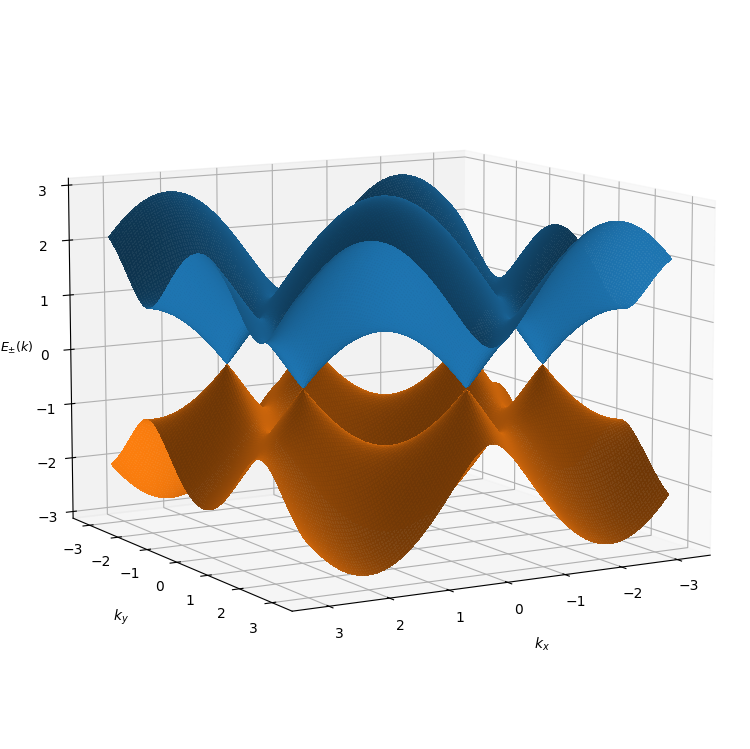

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
t1  = 1.0
t2  = 0
phi = np.pi/2
M   = 0
a   = 1.0

# Nearest-neighbor vectors
delta1 = np.array([ a/2,  np.sqrt(3)*a/2 ])
delta2 = np.array([ a/2, -np.sqrt(3)*a/2 ])
delta3 = np.array([-a,   0.0])
deltas = np.stack([delta1, delta2, delta3], axis=0)


b1 = delta2 - delta3
b2 = delta3 - delta1
b3 = delta1 - delta2
bs = np.stack([b1, b2, b3], axis=0)


n = 450
kx = np.linspace(-np.pi, np.pi, n)
ky = np.linspace(-np.pi, np.pi, n)
KX, KY = np.meshgrid(kx, ky, indexing="xy")


k_dot_delta = (deltas[:,0,None,None]*KX) + (deltas[:,1,None,None]*KY)
k_dot_b     = (bs[:,0,None,None]*KX)     + (bs[:,1,None,None]*KY)

f = sum(np.exp(1j*(KX*dx + KY*dy)) for dx,dy in deltas)
g = sum(np.cos(KX*bx + KY*by) for bx,by in bs)
h = sum(np.sin(KX*bx + KY*by) for bx,by in bs)


dx = t1 * np.real(f)
dy = -t1 * np.imag(f)
dz = M - 2.0 * t2 * np.sin(phi) * h
d0 = 2.0 * t2 * np.cos(phi) * g

abs_d = np.sqrt(dx**2 + dy**2 + dz**2)
E_plus  = d0 + abs_d
E_minus = d0 - abs_d


fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111, projection="3d")

ax.plot_surface(KX, KY, E_plus,  rstride=3, cstride=3, linewidth=0, antialiased=False, alpha=0.95)
ax.plot_surface(KX, KY, E_minus, rstride=3, cstride=3, linewidth=0, antialiased=False, alpha=0.95)


ax.set_xlabel(r"$k_x$", labelpad=15)
ax.set_ylabel(r"$k_y$", labelpad=15)
ax.set_zlabel(r"$E_{\pm}(k)$", labelpad=3, fontsize = 9)


ax.xaxis.set_rotate_label(False)
ax.yaxis.set_rotate_label(False)
ax.zaxis.set_rotate_label(False)


ax.xaxis.label.set_rotation(0)
ax.yaxis.label.set_rotation(0)
ax.zaxis.label.set_rotation(0)

ax.zaxis.set_label_coords(-1, 0.5)
ax.zaxis.label.set_clip_on(False)
ax.view_init(elev=10, azim=60)

fig = plt.gcf()
fig.subplots_adjust(left=0.92, right=0.98, top=0.92)
plt.tight_layout(rect=[0,0,1,0.95])

plt.savefig("haldane_dispersion_custom_delta.png", dpi=150, bbox_inches="tight")
plt.show()
